In [21]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = True 

In [10]:
# 독립변수가 여럿인 모델
import pandas as pd
import seaborn as sns
sales =pd.read_csv('../Data/7_3_lmm.csv')

In [11]:
sales.head()

,humidity,price,sales,temperature,weather
0,29.5,290,229.7,17.8,rainy
1,38.1,290,206.1,26.1,rainy
2,31.5,290,202.5,22.0,rainy
3,39.7,290,195.5,23.0,rainy
4,24.7,290,214.4,14.5,rainy


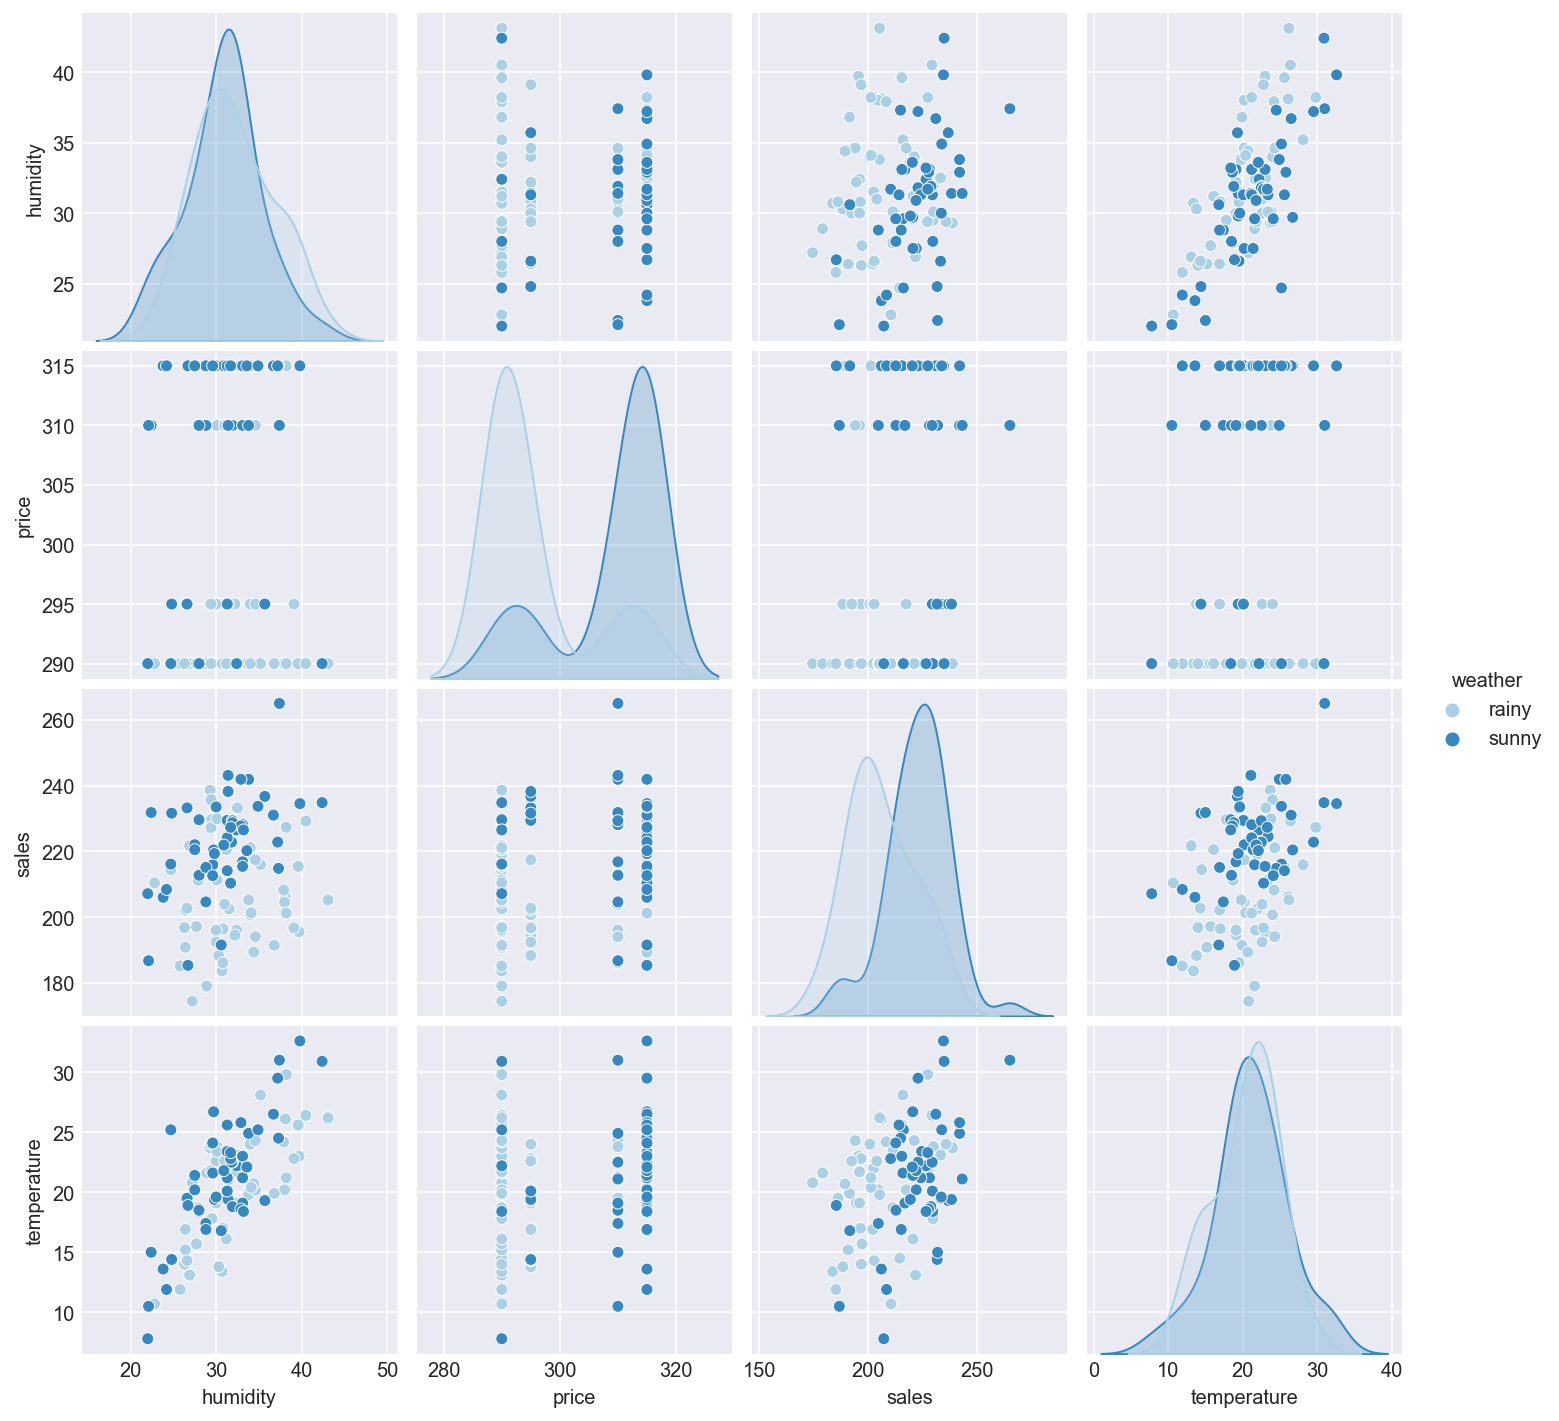

In [13]:
sns.pairplot(data=sales,hue='weather', palette='Blues')

In [24]:
lm = smf.ols('sales ~ price',sales).fit()
lm.params

Intercept    113.645406
price          0.332812
dtype: float64

In [25]:
sm.stats.anova_lm(lm,typ=2)

,sum_sq,df,F,PR(>F)
price,1398.392322,1.0,4.970685,0.028064
Residual,27570.133578,98.0,NaN,NaN


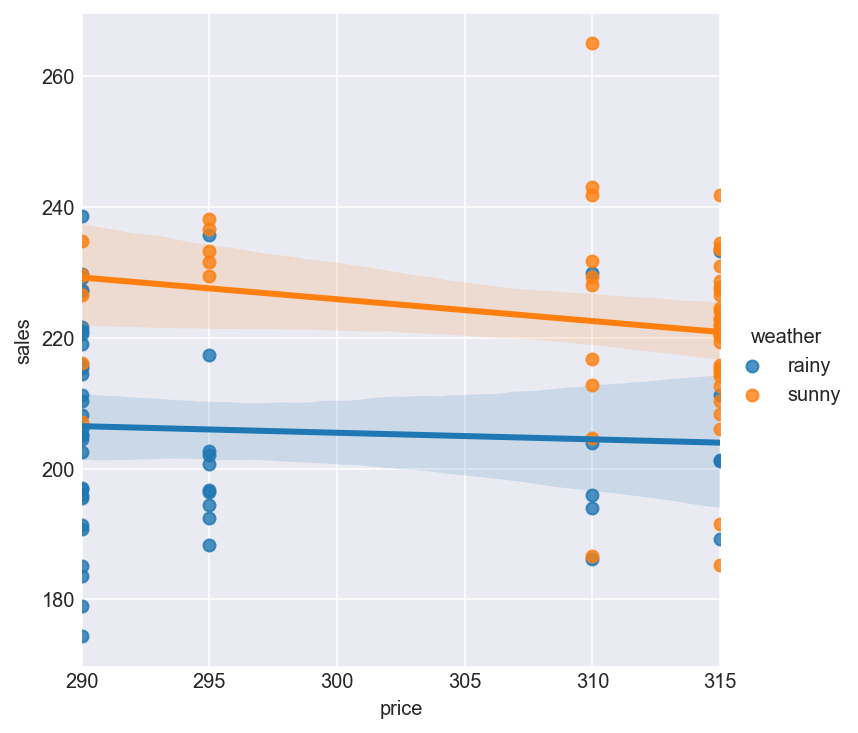

In [28]:
# 매상을 상품가격으로만 분석하여 문제의 소지 발생
sns.lmplot(data=sales, x='price', y='sales',hue='weather')

In [29]:
sales.groupby('weather').mean()

,humidity,price,sales,temperature
weather,,,,
rainy,32.126,295.5,205.924,20.422
sunny,30.852,309.5,222.718,21.102


In [30]:
# 독립변수가 4개인 모델 (전체)
lm_sales = smf.ols("sales ~ weather + humidity + temperature + price",
                  data = sales).fit()

In [32]:
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [38]:
# 분산분석
# 모든 독립변수가 유의미하다 --> 잘못된 검정 결과를 의심
sm.stats.anova_lm(lm_sales).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
humidity,1.0,1779.601,1779.601,9.805,0.002
temperature,1.0,2076.845,2076.845,11.443,0.001
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [37]:
lm_sales2 = smf.ols("sales ~ weather + temperature + humidity + price",
                   data = sales).fit()
sm.stats.anova_lm(lm_sales2).round(3)

,df,sum_sq,mean_sq,F,PR(>F)
weather,1.0,7050.961,7050.961,38.848,0.000
temperature,1.0,3814.779,3814.779,21.018,0.000
humidity,1.0,41.667,41.667,0.230,0.633
price,1.0,818.402,818.402,4.509,0.036
Residual,95.0,17242.717,181.502,NaN,NaN


In [39]:
# 순서만 바꿨지만 humidity의 유의계수가 달라짐. 문제가 있다고 판단이 가능함 (F검증. 0.05)

In [42]:
# 분산 분석 대신 회귀계수의 T검정을 수행하면 문제는 발생되지 않는다.
# 검정 다중성의 문제가 발생한다.
# 검정 다중성 : 검정을 반복함으로써 유의미한 결과를 얻기 쉬어지는 문제.
# 검정을 반복하면 귀무가설이 기각되기 쉬어지고 1종 오류를 범할 가능성이 높다.
# 1종오류 : 귀무가설이 참일때 기각할 확률

In [44]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [45]:
lm_sales2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [46]:
# 두 표 각각 데이터의 순서는 다르지만 p_value가 같다.
# humidity가 유의미하지 않다고 나옴.

In [49]:
## Type 2 ANOVA 
## 여러개의 독립변수를 한번에 할때

In [50]:
mod_full = smf.ols("sales ~ weather + humidity + temperature + price",
                  data = sales).fit()
sm.stats.anova_lm(mod_full,typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,5845.878,1.0,32.208,0.000
humidity,56.425,1.0,0.311,0.578
temperature,2378.017,1.0,13.102,0.000
price,818.402,1.0,4.509,0.036
Residual,17242.717,95.0,NaN,NaN


In [52]:
# humidity는 temperature과 강한 상관관계가 있으며, temperature라는 독립변수가 포함되어 있으면
# humidity는 매상에 영향을 끼친다고 볼 수 없다. 
mod_non_humi = smf.ols("sales ~ weather + temperature + price",
                      data = sales).fit()
sm.stats.anova_lm(mod_non_humi,typ=2).round(3)

,sum_sq,df,F,PR(>F)
weather,6354.966,1.0,35.266,0.000
temperature,4254.736,1.0,23.611,0.000
price,803.644,1.0,4.460,0.037
Residual,17299.142,96.0,NaN,NaN


Type  1 ANOVA 검정방법
- 복수의 독립변수를 가지는 경우 분산분석은 독립변수를 1개씩 늘려나가서 독립변수가 늘어남으로써 감소한 잔차 제곱합의 크기를 기반으로 독립변수 효과의 크기(분산분석표에서 sum_sq)를 계산한다.
- 이 방법은 독립변수를 추가하는 순서에 따라서 sum_sq 값의 크기가 크게 바뀌며 유의미한지 여부도 변할 수 있다.
- 독립변수가 여러 개 있을 경우 이 방법을 사용하면 잘못된 결과를 얻을 가능성이 있다.

Type 2 ANOVA 검정방법
- 독립변수가 줄어들면서 증가하는 잔차 제곱합의 크기에 기반해서 독립변수가 갖는 효과의 크기를 정량화 함.
- 변수를 추가하는 순서를 바꾸어도 검정 결과는 달라지지 않는다

- 독립변수간에 강한 상관관계가 있을 때 나타나는 문제가 다중공선성, 기온과 습도간의 상관관계
- 상관관계가 강한 변수 중 어느 한쪽을 제거
- 다중공선성이 있으면 추정된 계수의 해석이 어려워지고 검정에서 얻은 p값 역시 해석이 어렵다
- 리지회귀등을 이용함으로써 이런 문제를 완화할 수 있다.